In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
pylab.rcParams['figure.figsize'] = (10, 6)
from scipy.interpolate import InterpolatedUnivariateSpline
from classy import Class
cosmo=Class()
cosmo.empty()


from matplotlib.pyplot import cm 

def print_now(msg):
    print(msg)
    sys.stdout.flush()


pylab.rcParams['figure.figsize'] = (12, 8)
pylab.rc('text', usetex = True)
pylab.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

import scipy
from scipy import integrate

#from mpmath import exp, tanh, cos, quadosc, inf,sin

Populating the interactive namespace from numpy and matplotlib


In [2]:
#y=ell/ells

#rho_gnfw
def rho_nfw(x,y):
    return 1./x*1./pow(1.+x,2)*pow(x,2)*sin(x*y)/(x*y)

# def Infw_rho_romb(y):
#     return integrate.romberg(lambda x: rho_gnfw(x,y), 1.e-6, 10.,divmax=200,tol=1e-15)

# def Infw_rho_romb(y):
    
#     return quadosc(lambda x: 1./x*1./pow(1.+x,2)*pow(x,2)*sin(x*y)/(x*y), [0, inf], omega=y)
def Infw_rho_romb(y):
    result, err = integrate.quad(lambda x: 1./x*1./pow(1.+x,2)*pow(x,2)/(x*y), 1e-5, 5., weight='sin', wvar=y)
    #print(y,result,err)
    return result

y=np.logspace(-6,4,1000)
Iy = []
for yp in y:
    Iy.append(Infw_rho_romb(yp))
Iy =np.asarray(Iy)


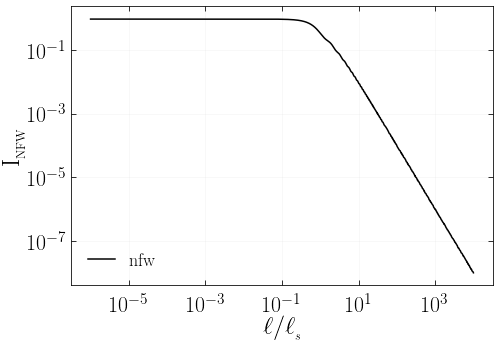

In [3]:
label_size = 22
title_size = 25
legend_size = 18
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1



ax.plot(y,Iy,c='k',label=r'$\mathrm{nfw}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$\ell/\ell_{_{s}}$',size=title_size)
ax.set_ylabel('$\mathrm{I_{_{NFW}}}$',size=title_size)
ax.yaxis.set_label_coords(-.097,0.5) 


ax.legend(loc=3,ncol=1,prop={'size':legend_size},handlelength=handle_length,frameon=False)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)


ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')



# plt.text(0.35,0.5,r'$\mathrm{I_{_{GNFW}}}=\int_{0}^{+\infty}\mathrm{d}xx^{2}\frac{\sin\left(\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}\right)}{\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}}\frac{P\left(x\right)}{P_{{\scriptscriptstyle \mathrm{0}}}}$',horizontalalignment='center',
#      verticalalignment='center', transform = ax.transAxes,fontsize=20)




plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

plt.grid(which='both',alpha=0.1)
fig.tight_layout()



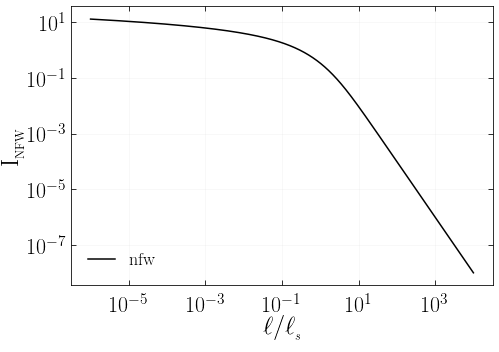

In [16]:
label_size = 22
title_size = 25
legend_size = 18
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1



ax.plot(y,Iy,c='k',label=r'$\mathrm{nfw}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$\ell/\ell_{_{s}}$',size=title_size)
ax.set_ylabel('$\mathrm{I_{_{NFW}}}$',size=title_size)
ax.yaxis.set_label_coords(-.097,0.5) 


ax.legend(loc=3,ncol=1,prop={'size':legend_size},handlelength=handle_length,frameon=False)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)


ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')



# plt.text(0.35,0.5,r'$\mathrm{I_{_{GNFW}}}=\int_{0}^{+\infty}\mathrm{d}xx^{2}\frac{\sin\left(\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}\right)}{\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}}\frac{P\left(x\right)}{P_{{\scriptscriptstyle \mathrm{0}}}}$',horizontalalignment='center',
#      verticalalignment='center', transform = ax.transAxes,fontsize=20)




plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

plt.grid(which='both',alpha=0.1)
fig.tight_layout()



In [4]:
lnell_over_ells = np.log(y)
lnI = np.log(Iy)

np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/class_sz_lnInfw-vs-lnell-over-ells_xout_5.txt',np.c_[lnell_over_ells,lnI])




In [2]:
#y=ell/ell500

#P13


def plc_gnfw_P13(x,y):
    c500 = 1.81
    gammaGNFW = 0.31
    alphaGNFW = 1.33
    betaGNFW = 4.13
    return 1.\
    /(
    pow(c500*x,gammaGNFW)\
    *pow(1.+ pow(c500*x,alphaGNFW),\
    (betaGNFW-gammaGNFW)
    /alphaGNFW)\
    )\
    *pow(x,2)\
    *sin(x*y)\
    /(x*y)
    
def Ignfw_P13_romb(y):
    return scipy.integrate.romberg(lambda x: plc_gnfw_P13(x,y), 1.e-6, 10.,divmax=20,tol=1e-8)




#A10



def plc_gnfw_A10(x,y):
    c500 = 1.156
    gammaGNFW = 0.3292
    alphaGNFW = 1.0620
    betaGNFW = 5.4807

    return 1.\
    /(
    pow(c500*x,gammaGNFW)\
    *pow(1.+ pow(c500*x,alphaGNFW),\
    (betaGNFW-gammaGNFW)
    /alphaGNFW)\
    )\
    *pow(x,2)\
    *sin(x*y)\
    /(x*y)
    
def Ignfw_A10_romb(y):
    return scipy.integrate.romberg(lambda x: plc_gnfw_A10(x,y), 1.e-6, 10.,divmax=20,tol=1e-8)





def plc_gnfw(X,Y,GAMMA,ALPHA,BETA):
    A = (2.-GAMMA)*ALPHA/(GAMMA-BETA)
    B = ALPHA +A
    C = (GAMMA-BETA)/ALPHA

    return sin(X*Y)/(X*Y)*pow(X**A+X**B,C)\

    
def Hgnfw_romb(y,GAMMA,ALPHA,BETA):
    return scipy.integrate.romberg(lambda x: plc_gnfw(x,y,GAMMA,ALPHA,BETA), 1.e-7, 20.,divmax=100,tol=1e-13)
    #return scipy.integrate.quad(lambda x: plc_gnfw(x,y,GAMMA,ALPHA,BETA), 1.e-7, 20,epsabs=1e-15)[0]
    #return scipy.integrate.fixed_quad(lambda x: plc_gnfw(x,y,GAMMA,ALPHA,BETA), 1.e-7, 20,n=10)[0]








In [3]:
y=np.logspace(-3,2,50)
Iy = []
for yp in y:
    Iy.append(Ignfw_P13_romb(yp))
Iy_P13=np.asarray(Iy)


Iy = []
for yp in y:
    Iy.append(Ignfw_A10_romb(yp))
    
Iy_A10=np.asarray(Iy)

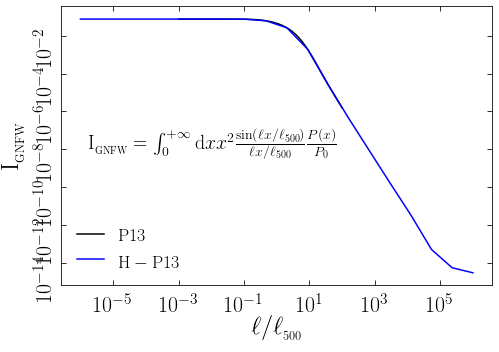

In [5]:

label_size = 22
title_size = 25
legend_size = 18
handle_length = 1.5
t=0.
def col(t):
    return (t,t,t)

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1

y=np.logspace(-3,2,50)

ax.plot(y,Iy_P13,c='k',label=r'$\mathrm{P13}$')





y=np.logspace(-6,6,20)


c = 1.81
g = 0.31
a = 1.33
b = 4.13

Iy = []
for yp in y:
    Iy.append(Hgnfw_romb(yp/c,g,a,b))    
    
Iy=np.asarray(Iy)
ax.plot(y,Iy/c**3.,c='blue',label=r'$\mathrm{H-P13}$')



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$\ell/\ell_{_{500}}$',size=title_size)
ax.set_ylabel('$\mathrm{I_{_{GNFW}}}$',size=title_size)
ax.yaxis.set_label_coords(-.07,0.5) 


ax.legend(loc=3,ncol=1,prop={'size':legend_size},handlelength=handle_length,frameon=False)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)


ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')



plt.text(0.35,0.5,r'$\mathrm{I_{_{GNFW}}}=\int_{0}^{+\infty}\mathrm{d}xx^{2}\frac{\sin\left(\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}\right)}{\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}}\frac{P\left(x\right)}{P_{{\scriptscriptstyle \mathrm{0}}}}$',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=20)




plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)


fig.tight_layout()





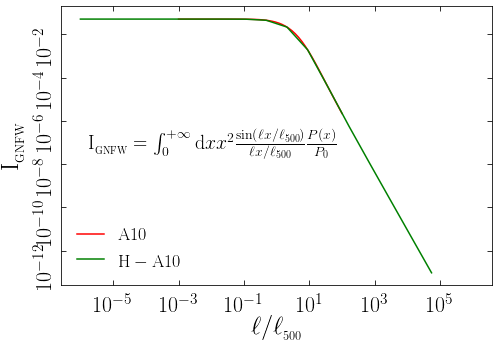

In [174]:

label_size = 22
title_size = 25
legend_size = 18
handle_length = 1.5
t=0.
def col(t):
    return (t,t,t)

fig, (ax1) = plt.subplots(1,1,figsize=(7,5))
ax = ax1

y=np.logspace(-3,2,50)

ax.plot(y,Iy_A10,c='red',label=r'$\mathrm{A10}$')





y=np.logspace(-6,6,20)





c = 1.156
g= 0.3292
a = 1.0620
b = 5.4807




Iy = []
for yp in y:
    Iy.append(Hgnfw_romb(yp/c,g,a,b))    
    
Iy=np.asarray(Iy)
ax.plot(y,Iy/c**3.,c='green',label=r'$\mathrm{H-A10}$')



ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$\ell/\ell_{_{500}}$',size=title_size)
ax.set_ylabel('$\mathrm{I_{_{GNFW}}}$',size=title_size)
ax.yaxis.set_label_coords(-.07,0.5) 


ax.legend(loc=3,ncol=1,prop={'size':legend_size},handlelength=handle_length,frameon=False)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)


ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')


plt.text(0.35,0.5,r'$\mathrm{I_{_{GNFW}}}=\int_{0}^{+\infty}\mathrm{d}xx^{2}\frac{\sin\left(\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}\right)}{\ell x/\ell_{{\scriptscriptstyle \mathrm{500}}}}\frac{P\left(x\right)}{P_{{\scriptscriptstyle \mathrm{0}}}}$',horizontalalignment='center',
     verticalalignment='center', transform = ax.transAxes,fontsize=20)



plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)


fig.tight_layout()





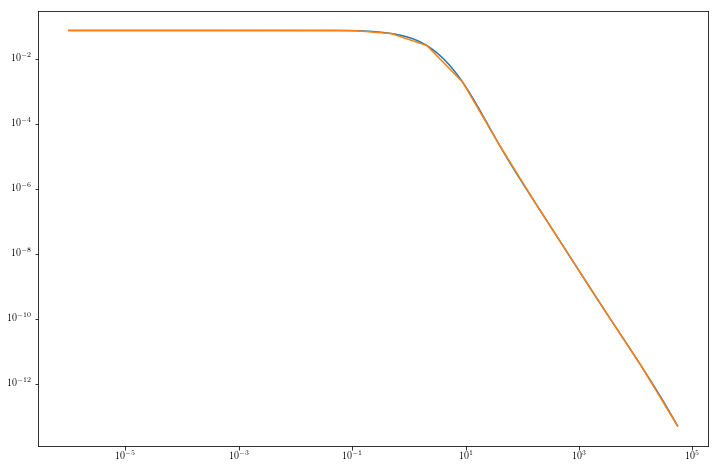

In [6]:
x_array  = y
y_array = Iy/c**3.

y_array = y_array[:len(y_array)-2]

x_array = x_array[:len(x_array)-2]



xnew = np.logspace(np.log10(x_array.min()),np.log10(x_array.max()),100) #300 represents number of points to make between T.min and T.max


 
tck = scipy.interpolate.splrep(np.log(x_array),np.log(y_array),s=0)  
ynew = scipy.interpolate.splev(np.log(xnew),tck,der=0) 

plt.plot(xnew,np.exp(ynew))




plt.plot(x_array,y_array)
plt.loglog()

yder2 = scipy.interpolate.splev(np.log(xnew),tck,der=2) 
#print yder2


#np.savetxt('class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_A10.txt',
#           np.c_[np.log(xnew),ynew,yder2], fmt='%1.4e',delimiter='\t\t\t')


In [7]:
def splint(xa,ya,y2a,x):
    klo=0
    khi = len(xa)-1
    #klo=1
    # khi=n
    while (khi-klo>1):
        k=(khi+klo)/2
        if (xa[k]>x):
            khi=k
        else:
            klo=k
    h=xa[khi]-xa[klo]
    if (h==0.):
        print 'bad xa input in splint'
        return -1
    a=(xa[khi]-x)/h
    b=(x-xa[klo])/h
    y=a*ya[klo]+b*ya[khi]+((a**3-a)*y2a[klo]+(b**3-b)*y2a[khi])*(h**2)/6.
    return y 




[]

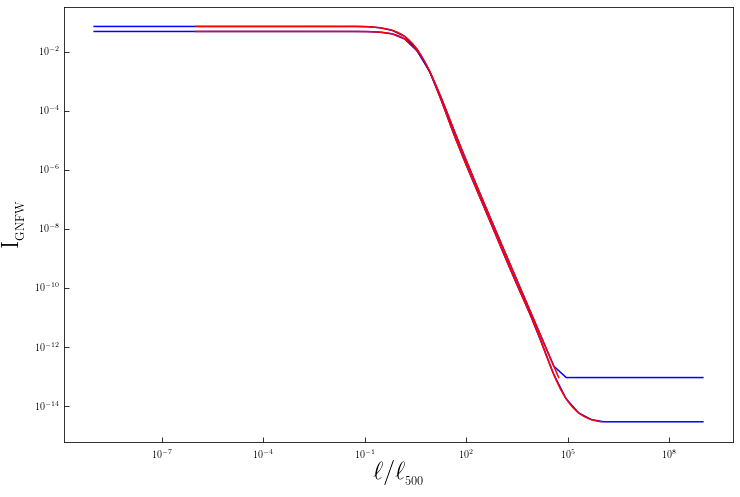

In [15]:
PP = np.loadtxt('class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_A10.txt')

lnx = PP[:,0]
lnI = PP[:,1]
d2lnI = PP[:,2]
N_PP=len(lnx)
lnx_max = max(lnx)
lnx_min = min(lnx)


x_asked_array = np.logspace(-9,9,50)
y=[]
for x_asked in x_asked_array:
    ln_x_asked = np.log(x_asked)
    if (ln_x_asked<lnx_min):
        y.append(lnI[0])
    elif (ln_x_asked>lnx_max):
        y.append(lnI[N_PP-1])
    else:
        y.append(splint(lnx,lnI,d2lnI,ln_x_asked))

y=np.array(y)


plt.plot(x_asked_array,np.exp(y),c='b')

plt.plot(np.exp(lnx),np.exp(lnI),c='r')


PP = np.loadtxt('class_sz_lnIgnfw-and-d2lnIgnfw-vs-lnell-over-ell500_P13.txt')

lnx = PP[:,0]
lnI = PP[:,1]
d2lnI = PP[:,2]
N_PP=len(lnx)
lnx_max = max(lnx)
lnx_min = min(lnx)


x_asked_array = np.logspace(-9,9,50)
y=[]
for x_asked in x_asked_array:
    ln_x_asked = np.log(x_asked)
    if (ln_x_asked<lnx_min):
        y.append(lnI[0])
    elif (ln_x_asked>lnx_max):
        y.append(lnI[N_PP-1])
    else:
        y.append(splint(lnx,lnI,d2lnI,ln_x_asked))

y=np.array(y)


plt.plot(x_asked_array,np.exp(y),c='b')

plt.plot(np.exp(lnx),np.exp(lnI),c='r')

ax = plt 
ax.xlabel('$\ell/\ell_{_{500}}$',size=title_size)
ax.ylabel('$\mathrm{I_{_{GNFW}}}$',size=title_size)


ax.legend(loc=3,ncol=1,prop={'size':legend_size},handlelength=handle_length,frameon=False)
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)




plt.loglog()


